In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

filename = 'C:/Users/Saisandeep/Documents/Udacity Data Analyst/Titanic_Data_Analysis/Titanic_Data.csv'
titanic_data = pd.read_csv(filename)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


The above sample of the data that shows all the columns in the data and top 5 records.

Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [90]:
titanic_data.drop('Name', 1, inplace = True )
titanic_data.drop('Ticket', 1, inplace = True)

The columns 'Name' and the 'Ticket' will not be helpful any sort of analaysis and we cannot perform any analysis based on these columns. So I have dropped these columns. Below is the details regarding the missing values in the rest of the columns. 

In [91]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 10 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(7), object(3)
memory usage: 69.8+ KB


Above information shows that there are 891 records and we have null values in the columns 'Age', 'Cabin', 'Embarked'. In case of age and embarked there are enough record even if we drop the records which have null values. So my analysis with respect to Age and Embarked have null values excuded. In case of Cabin, there are many records with null values, but it doesn't make sense to take average of the available values to fill up the missing values. Missing values in categorical data needs to be handled in different way. As of now I am using Cabin data which is available and excluding the records which doesnt have cabin data when analyzing with respect to Cabin data. 

In [92]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Seeing the data and the basic statistics I can say factors for survival can be based on 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'. There could be reasons which can be based on multiple factors. I will start analyzing the data from each factor.

First let us understand how many passengers survived in total and what are the chances of survival for any passengers. Below is the analysis for the Survived column

Number of people survived =  342
Number of people died =  549
Chance of survival =  0.383838383838


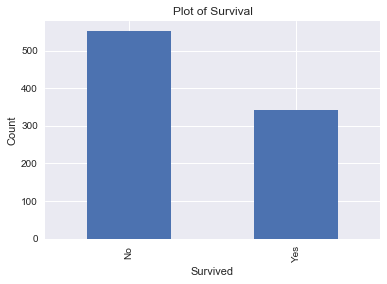

In [93]:
survived_data = []
for i in titanic_data['Survived']:
    #print i
    if i == 1.0:
        survived_data.append('Yes')
    else:
        survived_data.append('No')      
        
survived_data = pd.Series(survived_data)
#print survived_data
survived_data.value_counts().plot(kind = 'bar')

#titanic_data['Survived'].hist(bins = 3)
plt.title('Plot of Survival')
plt.xlabel('Survived')
plt.ylabel('Count')

survived_data =titanic_data[titanic_data.Survived == 1]
not_survived_data = titanic_data[titanic_data.Survived == 0]

print 'Number of people survived = ', len(survived_data)
print 'Number of people died = ', len(not_survived_data)
print 'Chance of survival = ', float(len(survived_data))/(len(survived_data)+len(not_survived_data))


From the above information it is clear that chance of any person surviving is only 38.4%. There are 342 survivors out of 891 passengers which is summarized in the above plot as well. The graph displays the the number of survivors and the number of passengers who didnt  survive.


In [96]:
def survived_data(a):
    if a.Survived == 1:
        a['Survived_data'] = 'Yes'
    else:
        a['Survived_data'] = 'No'
    return a

titanic_data = titanic_data.apply(survived_data, axis = 1)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_data
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,NaN,S,No
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C85,C,Yes
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,NaN,S,Yes
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,C123,S,Yes
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,NaN,S,No


With the above function I have added a column which gives out the informaiton of the Survival as "Yes" or "No" this helps in the graphs to get the appropriate ticks on the graphs.

I will be analyzing the gender mix in the passengers and how many "Males" and "Females" were on board. 

Number of Male Passengers = 577
Number of Female Passengers =  314


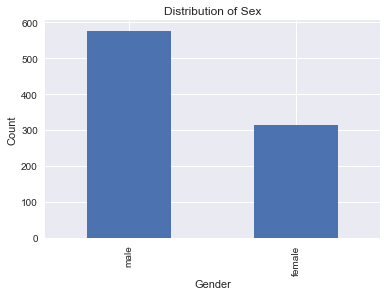

In [97]:
male_data = titanic_data[titanic_data.Sex == 'male']
female_data = titanic_data[titanic_data.Sex == 'female']

print 'Number of Male Passengers =', len(male_data)
print 'Number of Female Passengers = ', len(female_data)

titanic_data.Sex.value_counts().plot(kind = 'bar')
plt.title('Distribution of Sex')
plt.xlabel('Gender')
plt.ylabel('Count')


Number of Male Passengers Survived =  109
Chance of Male Passenger Survival =  0.188908145581
Number of Female Passengers Survived =  233
Chance of Female Passenger Survival =  0.742038216561


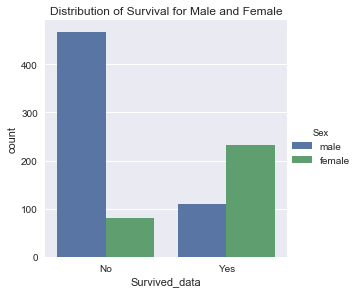

In [99]:
print 'Number of Male Passengers Survived = ', len(male_data[male_data.Survived == 1])
print 'Chance of Male Passenger Survival = ', float(len(male_data[male_data.Survived == 1]))/len(male_data)
print 'Number of Female Passengers Survived = ', len(female_data[female_data.Survived == 1])
print 'Chance of Female Passenger Survival = ', float(len(female_data[female_data.Survived == 1]))/len(female_data)

sns.factorplot('Survived_data', hue='Sex', data= titanic_data, kind='count', legend = True )
plt.title('Distribution of Survival for Male and Female')



The above plot and analysis shows the number of survivors from Male and Female passengers. Also I have calculated the chances of survival for male and female passengers. Below is the plot which displays the comparision.

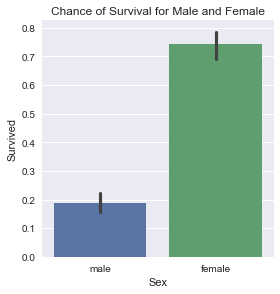

In [100]:
sns.factorplot(y = 'Survived', x= 'Sex', data= titanic_data, kind='bar', legend = True )
plt.title('Chance of Survival for Male and Female')

From the above analysis it is clear that there is a high chance for Female passengers to survive when compared to Male passengers.

Now I will analyze the Age column and the chances of survival with respect to age.

In [101]:
print titanic_data['Age'].min()
print titanic_data['Age'].max()

0.42
80.0


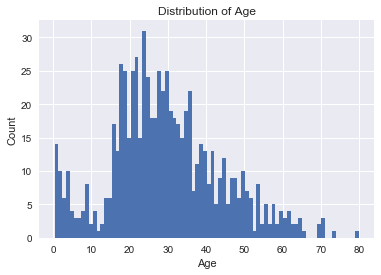

In [102]:
titanic_data['Age'].dropna().hist(bins =80)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')


From the analysis I figured out that the age of the youngest passenger is less than an year and oldest passenger is 80 years old. So I decided to club all the passengers whose age is less than one into one bin and rest all ages in to one bin each in the above graph. The above graph gives out the information of age and number of passengers at each age.

Now I would like to analyze if age has any significant effect on the chances of survival. Below is the plot that shows total passengers and passengers that survived at each age group.

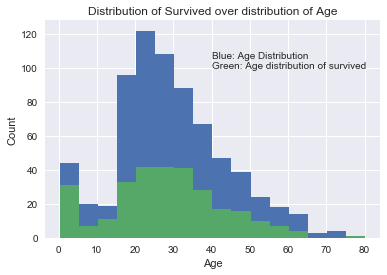

In [103]:
titanic_data['Age'].dropna().hist(bins =16)
titanic_data[titanic_data.Survived == 1].Age.dropna().hist(bins = 16, stacked = True)
plt.title('Distribution of Survived over distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.text(40,100,'Blue: Age Distribution \nGreen: Age distribution of survived')

I have plotted the above graph with ages of passengers grouped for every 5 years. From the above graph it is clear that the chances of survival for the age less than 15 is more when compared to the other age groups. I would alos like to look at this distribution sith a smooth curved like to confirm my analysis. So below is the graph that shows a curved distribution for survivors and non-survivors.

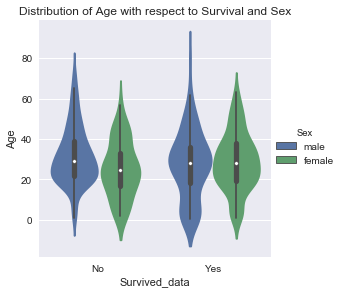

In [105]:
sns.factorplot( 'Survived_data','Age',hue = 'Sex', data = titanic_data, kind = 'violin')
plt.title('Distribution of Age with respect to Survival and Sex')

I can certainly see a bimodal graphin case of survivors. There is a small bump at the lower ages. From the above two graphs looks like the chance of survival increases with age being low. That is chance of survival of children is slightly more. Age of children less than 15 seems to have more chance of survival. 

Below is the analysis for the chances of survival based on age and sex. I would like to categorize the passengers as "Male", "Female" and "Child" and look at the chances of survival for each category.

In [136]:
def pass_type(a):
    if a.Age < 15:
        a['category'] = 'child'
    else:
        a['category'] = a.Sex
    return a

titanic_data_cat = titanic_data.apply(pass_type, axis = 1)
print titanic_data_cat.head()

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0          1.0       0.0     3.0    male  22.0    1.0    0.0   7.2500   NaN   
1          2.0       1.0     1.0  female  38.0    1.0    0.0  71.2833   C85   
2          3.0       1.0     3.0  female  26.0    0.0    0.0   7.9250   NaN   
3          4.0       1.0     1.0  female  35.0    1.0    0.0  53.1000  C123   
4          5.0       0.0     3.0    male  35.0    0.0    0.0   8.0500   NaN   

  Embarked Survived_data category  
0        S            No     male  
1        C           Yes   female  
2        S           Yes   female  
3        S           Yes   female  
4        S            No     male  


Number of Male passengers =  538
Number of Female passengers =  275
Number of Child passengers =  78


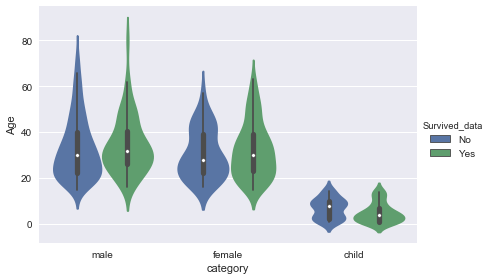

In [108]:
data_cat_male = titanic_data_cat[titanic_data_cat.category == 'male']
data_cat_female = titanic_data_cat[titanic_data_cat.category == 'female']
data_cat_child = titanic_data_cat[titanic_data_cat.category == 'child']

print 'Number of Male passengers = ', len(data_cat_male)
print 'Number of Female passengers = ', len(data_cat_female)
print 'Number of Child passengers = ', len(data_cat_child)


sns.factorplot(x='category', y = 'Age', hue='Survived_data', data= titanic_data_cat, kind='violin', \
               ci = None, legend = True, aspect = 1.5)

The above analysis shows the number of passengers from different categories. Also the graph shows the survivors and non-survivors distribution for each categoty against age. Now the graph looks smoother for each category

Number of Male passengers survived =  88
Number of Female passengers survived =  209
Number of Child passengers survived =  45


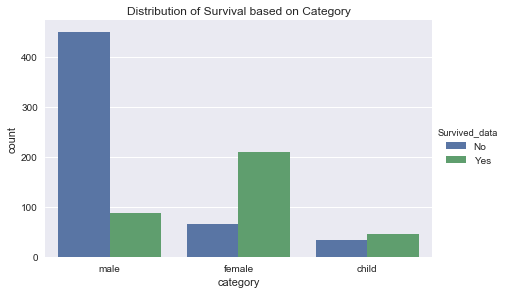

In [109]:
print 'Number of Male passengers survived = ', len(data_cat_male[data_cat_male.Survived == 1])
print 'Number of Female passengers survived = ', len(data_cat_female[data_cat_female.Survived == 1])
print 'Number of Child passengers survived = ', len(data_cat_child[data_cat_child.Survived == 1])

sns.factorplot(x='category', hue='Survived_data', data= titanic_data_cat, kind='count', \
               ci = None, legend = True, aspect = 1.5)
plt.title('Distribution of Survival based on Category')

The above analysis shows the number of passengers survived from each category and the plot shows the comparision of the same between all the three categories. Based on these numbers below is the anlaysis of chances of survival for each category.

Chance of Male passengers survival =  0.163568773234
Chance of Female passengers survival =  0.76
Chance of Child passengers survival =  0.576923076923


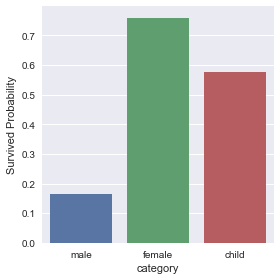

In [110]:
print 'Chance of Male passengers survival = ', float(len(data_cat_male[data_cat_male.Survived == 1]))/len(data_cat_male)
print 'Chance of Female passengers survival = ', float(len(data_cat_female[data_cat_female.Survived == 1]))/len(data_cat_female)
print 'Chance of Child passengers survival = ', float(len(data_cat_child[data_cat_child.Survived == 1]))/len(data_cat_child)

sns.factorplot(x='category', y='Survived', data= titanic_data_cat, kind='bar',  ci = None, legend = True, aspect = 1)
plt.ylabel('Survived Probability')


From the above analysis and plot we can see that Female and Child passengers have a greater chance of survival.

I would like to analyze the passenger class and the chances of survival with respect to the same.

Number of passengers in the 1st Class = 216
Number of passengers in the 2nd Class = 184
Number of passengers in the 3rd Class = 491


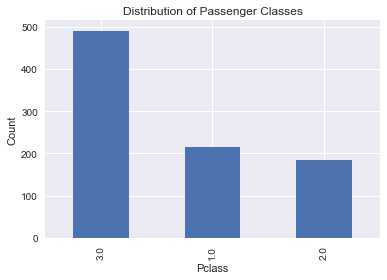

In [140]:
data_1st = titanic_data_cat[titanic_data_cat.Pclass==1]
data_2nd = titanic_data_cat[titanic_data_cat.Pclass==2]
data_3rd = titanic_data_cat[titanic_data_cat.Pclass==3]

print 'Number of passengers in the 1st Class =', len(data_1st)
print 'Number of passengers in the 2nd Class =', len(data_2nd)
print 'Number of passengers in the 3rd Class =', len(data_3rd)

#titanic_data['Pclass'].hist(bins = 5)
titanic_data['Pclass'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Passenger Classes')
plt.xlabel('Pclass')
plt.ylabel('Count')


The above plot shows the number of passengers in each class. Below is the analysis for the number of passengers survived from each class and the chances of survival for the passengers from each class.

In [112]:
print 'Number of 1st class passengers survived = ', len(data_1st[data_1st.Survived == 1])
print 'Number of 2nd class passengers survived = ', len(data_2nd[data_2nd.Survived == 1])
print 'Number of 3rd class passengers survived = ', len(data_3rd[data_3rd.Survived == 1])

print 'Chance of survival for 1st class passenger = ', float(len(data_1st[data_1st.Survived == 1]))/len(data_1st)
print 'Chance of survival for 2nd class passenger = ', float(len(data_2nd[data_2nd.Survived == 1]))/len(data_2nd)
print 'Chance of survival for 3rd class passenger = ', float(len(data_3rd[data_3rd.Survived == 1]))/len(data_3rd)


Number of 1st class passengers survived =  136
Number of 2nd class passengers survived =  87
Number of 3rd class passengers survived =  119
Chance of survival for 1st class passenger =  0.62962962963
Chance of survival for 2nd class passenger =  0.472826086957
Chance of survival for 3rd class passenger =  0.242362525458


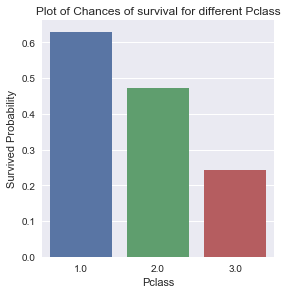

In [113]:
sns.factorplot(x='Pclass', y = 'Survived', data= titanic_data_cat, kind='bar',  ci = None, legend = True, aspect = 1.0 )
plt.title('Plot of Chances of survival for different Pclass')
plt.ylabel('Survived Probability')


From the above analysis it looks there is signigicantly higher chance for the 1st and 2nd class compard to the 3rd class. For further analysis I will analyze the categories and their survival chances with in each class.

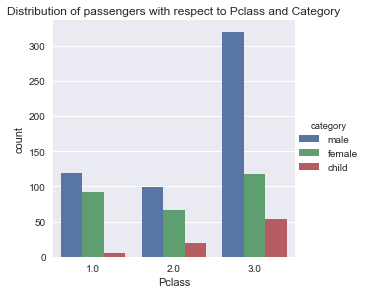

In [114]:
data_1st_male = data_1st[data_1st.category == 'male']
data_1st_female = data_1st[data_1st.category == 'female']
data_1st_child = data_1st[data_1st.category == 'child']
data_2nd_male = data_2nd[data_2nd.category == 'male']
data_2nd_female = data_2nd[data_2nd.category == 'female']
data_2nd_child = data_2nd[data_2nd.category == 'child']
data_3rd_male = data_3rd[data_3rd.category == 'male']
data_3rd_female = data_3rd[data_3rd.category == 'female']
data_3rd_child = data_3rd[data_3rd.category == 'child']

sns.factorplot(x='Pclass', hue = 'category', data= titanic_data_cat, kind='count',  ci = None, legend = True, aspect = 1.0 )
plt.title("Distribution of passengers with respect to Pclass and Category")

Above plot shows the number of passengers from each class and category. I would like to analyze the chances of survival for each of the group of passengers. Below is the analysis for the same.

In [115]:
print 'Chance of survival for Male 1st class Passenger =', float(len(data_1st_male[data_1st_male.Survived == 1]))/len(data_1st_male)
print 'Chance of survival for Female 1st class Passenger =', float(len(data_1st_female[data_1st_female.Survived == 1]))/len(data_1st_female)
print 'Chance of survival for Child 1st class Passenger =', float(len(data_1st_child[data_1st_child.Survived == 1]))/len(data_1st_child)
print 'Chance of survival for Male 2nd class Passenger =', float(len(data_2nd_male[data_2nd_male.Survived == 1]))/len(data_2nd_male)
print 'Chance of survival for FeMale 2nd class Passenger =', float(len(data_2nd_female[data_2nd_female.Survived == 1]))/len(data_2nd_female)
print 'Chance of survival for Child 2nd class Passenger =', float(len(data_2nd_child[data_2nd_child.Survived == 1]))/len(data_2nd_child)
print 'Chance of survival for Male 3rd class Passenger =', float(len(data_3rd_male[data_3rd_male.Survived == 1]))/len(data_3rd_male)
print 'Chance of survival for Female 3rd class Passenger =', float(len(data_3rd_female[data_3rd_female.Survived == 1]))/len(data_3rd_female)
print 'Chance of survival for Child 3rd class Passenger =', float(len(data_3rd_child[data_3rd_child.Survived == 1]))/len(data_3rd_child)


Chance of survival for Male 1st class Passenger = 0.352941176471
Chance of survival for Female 1st class Passenger = 0.978260869565
Chance of survival for Child 1st class Passenger = 0.8
Chance of survival for Male 2nd class Passenger = 0.0808080808081
Chance of survival for FeMale 2nd class Passenger = 0.909090909091
Chance of survival for Child 2nd class Passenger = 1.0
Chance of survival for Male 3rd class Passenger = 0.11875
Chance of survival for Female 3rd class Passenger = 0.504273504274
Chance of survival for Child 3rd class Passenger = 0.407407407407


We can see the chances of survival for each group of passengers based on Pclass and Category. I would like to plot the same for a better comparsion. Below is the plot of the chances of survival for each group of passengers.

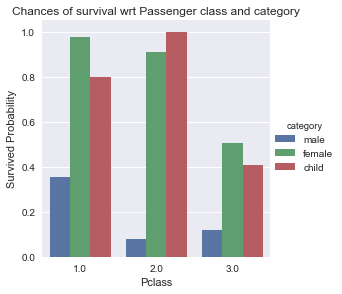

In [116]:
sns.factorplot(x='Pclass', y = 'Survived', hue='category', data= titanic_data_cat, kind='bar',  ci = None, legend = True, aspect = 1.0 )
plt.title('Chances of survival wrt Passenger class and category')
plt.ylabel('Survived Probability')


Above analysis shows the difference in the chances of survival for different classes and categories of the passengers. There is a clear higher chance of survival for females and children in the 1st and 2nd class passengers. Male first class passengers seems to have more chance of survival compared to male passengers from other classes.

Now I would like to analyze the Siblings and the Parents columns. Also understand the chances of survival based on these factors.

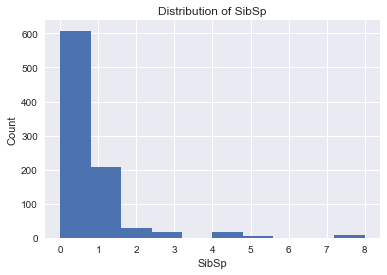

In [117]:
titanic_data['SibSp'].hist()
plt.title('Distribution of SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')


From the above graph looks like maximum passengers were not travelling with any siblings on board. 

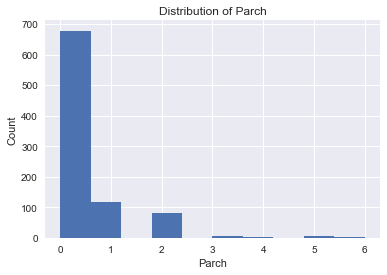

In [118]:
titanic_data['Parch'].hist()
plt.title('Distribution of Parch')
plt.xlabel('Parch')
plt.ylabel('Count')


Above graph shows the number of passengers travelling with their parents and grand parents. Looks like there are not many passengers in this group as well. So I would like to see survival chances with respect each of these data.

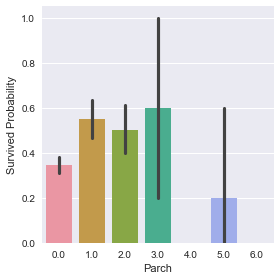

In [119]:
sns.factorplot('Parch', 'Survived',data = titanic_data_cat, kind = 'bar')
plt.ylabel('Survived Probability')


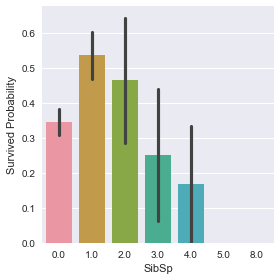

In [120]:
sns.factorplot('SibSp', 'Survived',data = titanic_data_cat, kind = 'bar')
plt.ylabel('Survived Probability')


I dont see really significant difference in chance of survival each of the above graphs. So I would like to combine these two information into one column and call it family. Below is the analysis based on the passengers travelling with Family and chances of survival for these passengers.

In [121]:
data_no_family = titanic_data_cat[((titanic_data_cat.Parch == 0.0) & (titanic_data_cat.SibSp == 0.0))]
data_with_family = titanic_data_cat[((titanic_data_cat.Parch != 0.0) | (titanic_data_cat.SibSp != 0.0))]

print 'Number of passengers with family = ', len(data_with_family)
print 'Number of passengers without family = ', len(data_no_family)
print 'Number of passengers with family Survived = ', len(data_with_family[data_with_family.Survived ==1])
print 'Number of passengers without family Survived = ', len(data_no_family[data_no_family.Survived ==1])
print 'Chance of Survival with Family = ', float(len(data_with_family[data_with_family.Survived ==1]))/len(data_with_family)
print 'Chance of Survival without Family = ', float(len(data_no_family[data_no_family.Survived ==1]))/len(data_no_family)

Number of passengers with family =  356
Number of passengers without family =  537
Number of passengers with family Survived =  179
Number of passengers without family Survived =  163
Chance of Survival with Family =  0.502808988764
Chance of Survival without Family =  0.303538175047


Below function would add a column called Family to the data and we can do further analysis based on the same.

In [122]:
def family(passenger):
    if ((passenger.Parch == 0) and (passenger.SibSp == 0)):
        passenger['Family'] = 'No'
    else:
        passenger['Family'] = 'Yes'
    
    return passenger
        
titanic_data_family = titanic_data_cat.apply(family, axis = 1)
print titanic_data_family.head()

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0          1.0       0.0     3.0    male  22.0    1.0    0.0   7.2500   NaN   
1          2.0       1.0     1.0  female  38.0    1.0    0.0  71.2833   C85   
2          3.0       1.0     3.0  female  26.0    0.0    0.0   7.9250   NaN   
3          4.0       1.0     1.0  female  35.0    1.0    0.0  53.1000  C123   
4          5.0       0.0     3.0    male  35.0    0.0    0.0   8.0500   NaN   

  Embarked Survived_data category Family  
0        S            No     male    Yes  
1        C           Yes   female    Yes  
2        S           Yes   female     No  
3        S           Yes   female    Yes  
4        S            No     male     No  


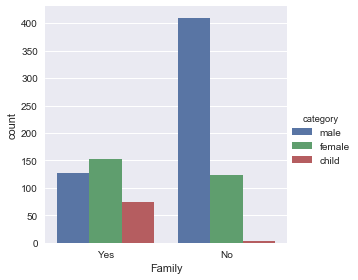

In [123]:
sns.factorplot('Family', hue = 'category',data = titanic_data_family, kind = 'count')

Above graph shows the number of passengers travelling with family with respect to category

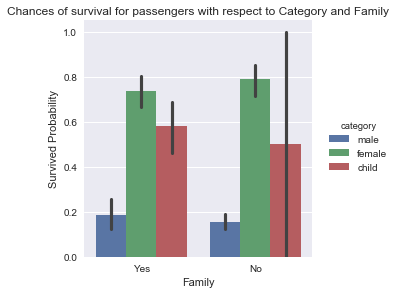

In [124]:
sns.factorplot('Family', 'Survived', hue = 'category',data = titanic_data_family, kind = 'bar')
plt.title('Chances of survival for passengers with respect to Category and Family')
plt.ylabel('Survived Probability')


From the above graph it looks like there is no significant effect of having family or not on the chances of survival. So I would like to see if the family has any effect with respect to Pclass. Below is the analysis and plot that shows the chances of survival for passengers with Family in each Pclass

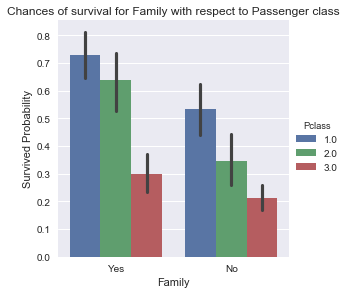

In [125]:
sns.factorplot('Family','Survived', hue = 'Pclass',data = titanic_data_family, kind = 'bar')
plt.title('Chances of survival for Family with respect to Passenger class')
plt.ylabel('Survived Probability')


From the above graph it cetainly looks like there is significant increase in chance of survival with family in each passenger class. 

Now I would like to analyze the Embarked port column and see if there is any effect of this on the chances of survival.

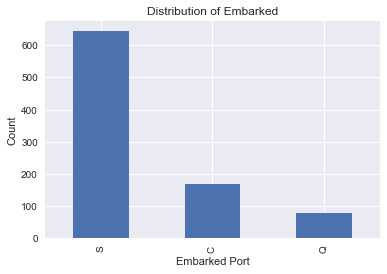

In [126]:
titanic_data.Embarked.value_counts().plot(kind = 'bar')
plt.title('Distribution of Embarked')
plt.xlabel('Embarked Port')
plt.ylabel('Count')


Above graph shows the number of passengers from each port. Let us analyze the number of passengers survived from each port.

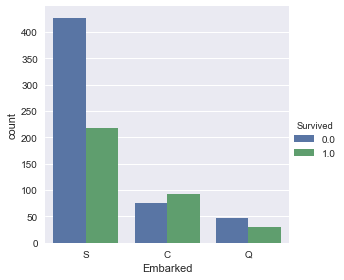

In [127]:
sns.factorplot(x='Embarked', hue='Survived', data= titanic_data_cat, kind='count',  ci = None, legend = True, aspect = 1.0 )

Above graph shows the number of passengers survived from each port. I would like to analyze the chances of survival for the passengers from diffrent ports based on the category. Below is the plot that shows the comparision of the survival chances based on port and category

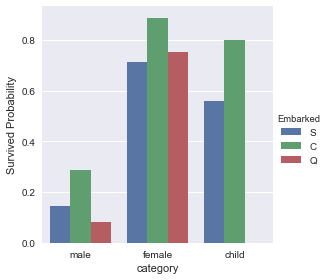

In [128]:
sns.factorplot(x='category', y = 'Survived', hue='Embarked', data= titanic_data_cat, kind='bar',  ci = None, legend = True, aspect = 1.0 )
plt.ylabel('Survived Probability')


Ideally there should not be any major difference between the chances of survival based on the port embarked. But looks like there is significant increase in chance if embarked at port "C" that is 'Cherbourg'. The reason could be the deck passengers from that port might be allocated. Passengers from that port must have been seated or allocated a portion of the ship that is easily accessible for the emergency evacuation.

I would like to see the last column, "Cabin" if it can help in any sort of analysis. So Cabin numbers would not help in much of the analysis. So I have used the Cabin numbers to determine the level of the passenger cabin to see if that can help in any good data analysis

In [129]:
level = []
for i in titanic_data['Cabin'].dropna():
    level.append(i[0])

cabin = pd.DataFrame(level)
cabin.columns = ['level']
cabin['level'].value_counts()

#sns.factorplot('level',order = ['A','B','C','D','E','F','G'], data =cabin, kind = 'count')

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: level, dtype: int64

The above analysis gives out the number of passengers in each level and looks like there is a lot of missing data. Let me try to analyze what ever records available as it doesnt look ideal to impute the missing values.

Below function adds a column called Level for each record based on the cabin number.

In [130]:
def addlevel(passenger):
    if isinstance(passenger.Cabin, str):
        passenger['level'] = passenger.Cabin[0]
    else:
        passenger['level'] = passenger.Cabin
    return passenger
        
titanic_data_level = titanic_data_family.apply(addlevel, axis = 1)

titanic_data_level.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived_data,category,Family,level
0,1.0,0.0,3.0,male,22.0,1.0,0.0,7.2500,NaN,S,No,male,Yes,NaN
1,2.0,1.0,1.0,female,38.0,1.0,0.0,71.2833,C85,C,Yes,female,Yes,C
2,3.0,1.0,3.0,female,26.0,0.0,0.0,7.9250,NaN,S,Yes,female,No,NaN
3,4.0,1.0,1.0,female,35.0,1.0,0.0,53.1000,C123,S,Yes,female,Yes,C
4,5.0,0.0,3.0,male,35.0,0.0,0.0,8.0500,NaN,S,No,male,No,NaN


I would like to show the plot of number of passengers in each of the levels and compare them.

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: level, dtype: int64


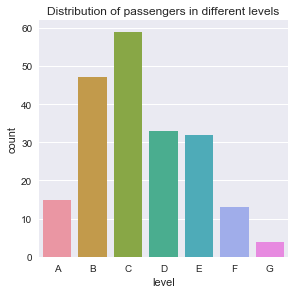

In [131]:
print titanic_data_level.level.value_counts()
sns.factorplot('level',data = titanic_data_level, kind = 'count', order = ['A','B','C','D','E','F','G'])
plt.title('Distribution of passengers in different levels')

Below is the plot to see number of survivors in each level.

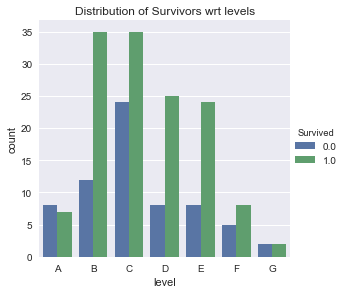

In [132]:
sns.factorplot('level',hue = 'Survived',data = titanic_data_level, kind = 'count', order = ['A','B','C','D','E','F','G'])
plt.title('Distribution of Survivors wrt levels')

Below is the plot to see chances of survival in each level. Looks like all of the levels are having similar chances of survival.

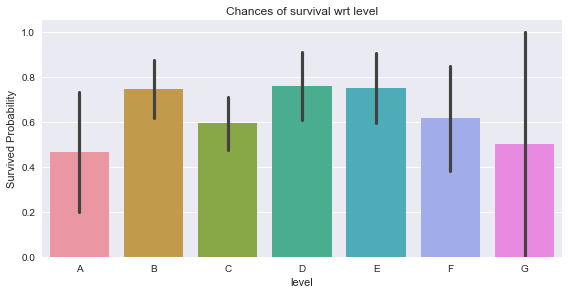

In [133]:
sns.factorplot('level','Survived',data = titanic_data_level, kind = 'bar', order = ['A','B','C','D','E','F','G'], aspect = 2)
plt.title('Chances of survival wrt level')
plt.ylabel('Survived Probability')


Below is the plot which shows the chances of survival with respect to level and category. This analysis shows that Females and children from the level A and B are having highest chances of survival. But remember that this is only small amout of data due to the missing values. So we need more data with the level information to conclude this analysis.

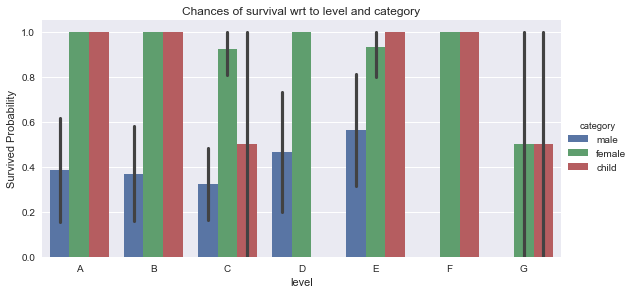

In [134]:
sns.factorplot('level','Survived', hue = 'category',data = titanic_data_level, kind = 'bar', order = ['A','B','C','D','E','F','G'], aspect = 2)
plt.title('Chances of survival wrt to level and category')
plt.ylabel('Survived Probability')


Below is the plot to see which levels belong which class of the passengers.

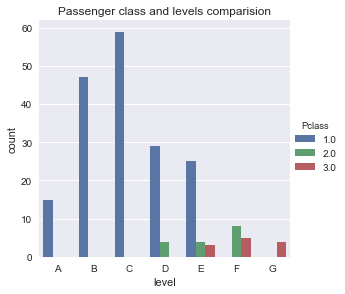

In [135]:
sns.factorplot('level',hue = 'Pclass',data = titanic_data_level,kind = 'count', order = ['A','B','C','D','E','F','G'] )
plt.title('Passenger class and levels comparision')

## Conclusion
Based on all the analysis, Strong factors that can affect the chances of survival are Age, Sex and Pclass. Other factors like Embarked port, Family and Cabin have less affect when compared to the earlier factors. I believe these factors have more affect when combined with one or more factors of Age, Sex and Pclass. I believe there was a cautious effort to save females and children. I have considered the children below age 15 as the child category as it looked like there was a significant change in chances of survival I observed for the age below 15. Passenger class had a significant effect on the survival chances as well. Based on the analysis of cabin  and passenger class I feel the levels were A, B, C, D, E, F, G were literally from top to bottom of the ship. So chances of survival for the passengers in the top levels of the ship are higher I believe. Family of the passengers made a significant effect on the survival chances as well.

### Limitations
There are missing values in the columns Age, Embarked and Cabin data. I have chosen to exclude the records in the analysis as I believe there are enough records even after excluding the missing records. In case of Cabin data I believe there are more missing records, so we have to be cautious while using that analysis. I believe excluding the missing records would reduce the significance of the analysis.
Information on groups of friends and family who boarded together and how many survived from each group would be useful to measure the significance of the family in the chances of survival. 
Information regarding where on the board passenger is located which can tell us the ease of escape from the ship or chance of the passenger getting on to the life boats is missing.
All the analysis I have done is based on individual factors and I believe there would be statistical significance that can be evaluated to each of the factor to see how significant is each factor and what played crusial role in chances of survival.




